In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv
/kaggle/input/covid19-symptoms-checker/Raw-Data.csv


In [2]:
raw_data = pd.read_csv("/kaggle/input/covid19-symptoms-checker/Raw-Data.csv")
raw_data

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes
1,Italy,10-19,Female,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing","Pains,Nasal-Congestion,Runny-Nose",Moderate,No
2,Iran,20-24,Transgender,"Fever,Tiredness,Dry-Cough","Pains,Nasal-Congestion",Severe,Dont-Know
3,Republic of Korean,25-59,NaN,"Fever,Tiredness",Pains,None,NaN
4,France,60+,NaN,Fever,"Nasal-Congestion,Runny-Nose,Diarrhea",NaN,NaN
5,Spain,NaN,NaN,"Tiredness,Dry-Cough,Difficulty-in-Breathing,So...","Nasal-Congestion,Runny-Nose",NaN,NaN
6,Germany,NaN,NaN,"Tiredness,Dry-Cough,Difficulty-in-Breathing",Nasal-Congestion,NaN,NaN
7,UAE,NaN,NaN,"Tiredness,Dry-Cough","Runny-Nose,Diarrhea",NaN,NaN
8,Other-EUR,NaN,NaN,Tiredness,Runny-Nose,NaN,NaN
9,Other,NaN,NaN,"Dry-Cough,Difficulty-in-Breathing,Sore-Throat",Diarrhea,NaN,NaN


In [3]:
cl_data = pd.read_csv("/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv")
cl_data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [4]:
# Checking information of all columns
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [5]:
#Droping unwanted Columns
cl_data = cl_data.drop(['None_Sympton','None_Experiencing','Age_60+','Gender_Transgender','Severity_Severe','Contact_Dont-Know','Country'], axis=1 )

<AxesSubplot:>

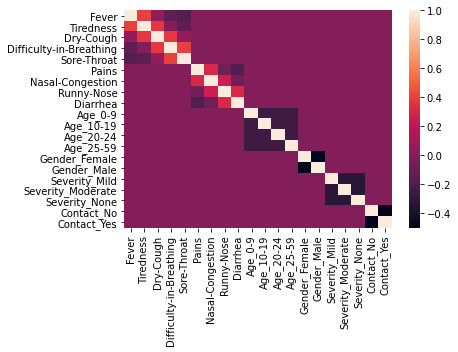

In [6]:
#Creating Correlation between Columns using Heatmap
import seaborn as sns
corr = cl_data.corr()
sns.heatmap(corr , xticklabels = corr.columns , yticklabels = corr.columns , annot = False)

In [7]:
#Correlation between Columns in Values
cl_data.corr()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Contact_No,Contact_Yes
Fever,1.000000e+00,4.045199e-01,5.096472e-02,-1.348400e-01,-1.636364e-01,2.336708e-17,-8.120278e-17,-1.708735e-16,-4.663218e-17,6.959228e-16,5.727470e-16,-4.855571e-17,-5.201061e-16,-1.483883e-17,1.696918e-17,7.059231e-17,5.830736e-17,4.350871e-17,1.670554e-17,3.950940e-17
Tiredness,4.045199e-01,1.000000e+00,3.779645e-01,4.629153e-17,-1.348400e-01,2.612420e-17,-6.526807e-17,-1.561936e-16,-5.916164e-17,4.505202e-16,8.882113e-17,-8.576039e-17,4.494736e-16,8.081032e-17,9.912807e-17,8.139976e-17,6.958681e-17,4.345281e-17,2.111522e-17,4.519331e-17
Dry-Cough,5.096472e-02,3.779645e-01,1.000000e+00,3.779645e-01,5.096472e-02,4.519459e-18,-5.180861e-17,-9.767619e-17,-1.403602e-17,-1.896458e-17,3.856237e-16,-2.104144e-16,-3.836201e-16,-1.167547e-17,2.092473e-17,6.498479e-17,5.418947e-17,2.588705e-17,1.783502e-17,2.351915e-17
Difficulty-in-Breathing,-1.348400e-01,4.629153e-17,3.779645e-01,1.000000e+00,4.045199e-01,-9.663757e-19,1.076763e-17,-1.091121e-17,1.067239e-17,5.170407e-16,1.351575e-16,-4.082214e-16,-6.537695e-17,1.121118e-16,9.093935e-17,1.982934e-17,2.211974e-17,8.468805e-18,7.437867e-18,-1.019594e-18
Sore-Throat,-1.636364e-01,-1.348400e-01,5.096472e-02,4.045199e-01,1.000000e+00,-1.063529e-17,3.705775e-17,2.844633e-17,1.819491e-17,-5.386233e-16,-2.669911e-16,-9.614176e-18,2.421704e-16,-3.973996e-17,-5.405934e-17,-9.961580e-18,-3.405939e-18,-3.155159e-18,-9.047247e-18,-1.092037e-17
Pains,2.336708e-17,2.612420e-17,4.519459e-18,-9.663757e-19,-1.063529e-17,1.000000e+00,3.105295e-01,-6.900656e-02,-1.785714e-01,4.312160e-16,1.639895e-16,3.621518e-17,-6.083645e-16,-1.216691e-16,6.398151e-17,7.761069e-18,6.884521e-18,1.589900e-18,2.054435e-18,3.357220e-18
Nasal-Congestion,-8.120278e-17,-6.526807e-17,-5.180861e-17,1.076763e-17,3.705775e-17,3.105295e-01,1.000000e+00,2.666667e-01,-6.900656e-02,-4.171571e-16,2.592296e-17,2.897753e-16,-2.676030e-16,-1.749997e-17,-3.172513e-16,6.092759e-18,6.829059e-18,2.947637e-18,1.250398e-18,2.676598e-18
Runny-Nose,-1.708735e-16,-1.561936e-16,-9.767619e-17,-1.091121e-17,2.844633e-17,-6.900656e-02,2.666667e-01,1.000000e+00,3.105295e-01,-1.748218e-15,-9.737599e-16,-4.729600e-17,9.949420e-16,8.987187e-17,-6.066829e-16,1.768420e-18,2.886685e-18,1.296245e-18,-3.456323e-19,5.520413e-19
Diarrhea,-4.663218e-17,-5.916164e-17,-1.403602e-17,1.067239e-17,1.819491e-17,-1.785714e-01,-6.900656e-02,3.105295e-01,1.000000e+00,4.435133e-17,1.055211e-16,-8.209526e-17,-1.596931e-16,-2.091912e-18,-6.871280e-17,-6.696088e-19,-2.035745e-19,5.148249e-19,-3.318778e-19,-5.853257e-20
Age_0-9,6.959228e-16,4.505202e-16,-1.896458e-17,5.170407e-16,-5.386233e-16,4.312160e-16,-4.171571e-16,-1.748218e-15,4.435133e-17,1.000000e+00,-2.500000e-01,-2.500000e-01,-2.500000e-01,-7.428272e-16,-5.248003e-16,9.522544e-16,8.943125e-16,4.779495e-16,1.511126e-16,4.818786e-16


In [8]:
#Converting Categorical data(string) into dummies
cl_data = pd.get_dummies(cl_data)
cl_data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Contact_No,Contact_Yes
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
316796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
316797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
316798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


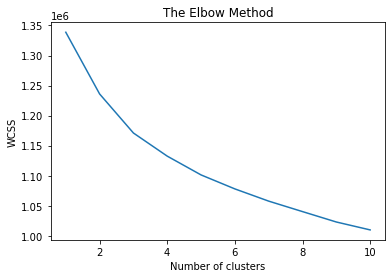

In [9]:
X = cl_data

#Elbow Method to find number of clusters 

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#Training Kmeans model on cl_data
kmeans = KMeans(n_clusters = 9 ,init = 'k-means++' , random_state = 1)
y_means = kmeans.fit_predict(X)

In [11]:
#Creating Dataframe of predicted values of Clusters
df = pd.DataFrame(y_means,columns = ['Cluster'])
df['Cluster']

0         2
1         2
2         2
3         2
4         2
         ..
316795    5
316796    7
316797    7
316798    5
316799    7
Name: Cluster, Length: 316800, dtype: int32

In [12]:
#Counting number of values in Clusters
for i in range(10) :
    print('Cluster',end=' ')
    print(i+1)
    print(df[df['Cluster']==i].count())

Cluster 1
Cluster    43600
dtype: int64
Cluster 2
Cluster    27600
dtype: int64
Cluster 3
Cluster    43200
dtype: int64
Cluster 4
Cluster    22200
dtype: int64
Cluster 5
Cluster    36000
dtype: int64
Cluster 6
Cluster    26600
dtype: int64
Cluster 7
Cluster    33600
dtype: int64
Cluster 8
Cluster    41400
dtype: int64
Cluster 9
Cluster    42600
dtype: int64
Cluster 10
Cluster    0
dtype: int64


In [13]:
#Counting number of values in Cluster 2
df[df['Cluster']==1].count()

Cluster    27600
dtype: int64

In [14]:
#Counting number of values in Cluster 3
df[df['Cluster']==2].count()

Cluster    43200
dtype: int64

In [15]:
#Counting number of values in Cluster 4
df[df['Cluster']==3].count()

Cluster    22200
dtype: int64

In [16]:
#Counting number of values in Cluster 5
df[df['Cluster']==4].count()

Cluster    36000
dtype: int64

In [17]:
#Counting number of values in Cluster 6
df[df['Cluster']==5].count()

Cluster    26600
dtype: int64

In [18]:
#Counting number of values in Cluster 7
df[df['Cluster']==6].count()

Cluster    33600
dtype: int64

In [19]:
#Counting number of values in Cluster 8
df[df['Cluster']==7].count()

Cluster    41400
dtype: int64

In [20]:
#Counting number of values in Cluster 9
df[df['Cluster']==8].count()

Cluster    42600
dtype: int64

In [21]:
#Counting number of values in Cluster 10
df[df['Cluster']==9].count()

Cluster    0
dtype: int64

In [22]:
#Saving model in file named model_cov
import pickle 
with open('model_cov','wb') as f:
    pickle.dump(kmeans,f)

In [23]:
#Loading File
with open('model_cov','rb') as f:
    model = pickle.load(f)

In [24]:
#Creating Temporary test dataset from training dataset
test = cl_data.iloc[1:10,:]

In [25]:
#Predicted values of saved model 
model.predict(test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [26]:
#Predicted values of trained model 
kmeans.predict(test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)